In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
scaler = MinMaxScaler()

In [ ]:
df = pd.read_excel("IBOVESPA.xlsx",index_col='Date',parse_dates=True)
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  for i in range(len(test)):
    row = [[a] for a in scaled_test_input[i:i+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
n_inputs = [21,63,84,126,189,252]
n_neurons = [14,42,56,84,126,168]
epochs=[1,3,5,7,10,15]
dropouts=[0,0.2,0.4]
losses=['mse','mae','huber_loss']
RMSE = []
Accuracy = []

# Hyperparameter Search

In [ ]:
from random import randrange
from numpy.random import seed

In [ ]:
for i in range (5):
  i=randrange(6)
  h=randrange(6)
  k=randrange(6)
  l=randrange(3)
  m=randrange(3)
  seed(1052023)
  n_features = 2
  n_input = n_inputs[i]
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  validation = df.iloc[int(len(df['Realised'])*0.6)-n_input:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_validation_input = scaler.transform(validation)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  validation = validation.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_validation_target = scaler.transform(validation)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dropout(dropouts[l]))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss=losses[m], metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=epochs[k])
  X = df_to_X_y(n_input,validation,scaled_validation_input)
  X=X.reshape(len(validation), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
  Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
  print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
  print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/5
118/118 [==============================] - 4s 13ms/step - loss: 0.0017 - accuracy: 2.6490e-04 - mean_absolute_error: 0.0374
Epoch 2/5
118/118 [==============================] - 1s 12ms/step - loss: 0.0013 - accuracy: 2.6490e-04 - mean_absolute_error: 0.0328
Epoch 3/5
118/118 [==============================] - 2s 13ms/step - loss: 0.0013 - accuracy: 2.6490e-04 - mean_absolute_error: 0.0322
Epoch 4/5
118/118 [==============================] - 1s 12ms/step - loss: 0.0012 - accuracy: 2.6490e-04 - mean_absolute_error: 0.0324
Epoch 5/5
18/18 [==============================] - 0s 9ms/step
Epoch: 5 | Inputs: 252 | Nodes: 168 | Dropout: 0 | Loss: huber_loss
RMSE: 0.0036357181117305567 | Accuracy: 67.93146338835938
Epoch 1/10
124/124 [==============================] - 3s 8ms/step - loss: 0.0353 - accuracy: 2.5361e-04 - mean_absolute_error: 0.0353
Epoch 2/10
124/124 [==============================] - 1s 9ms/step - loss: 0.0328 - accuracy: 2.5361e-04 - mean_absolute_error: 0.0328
Epoch 3

In [ ]:
for i in range (5):
  i=randrange(6)
  h=randrange(6)
  k=randrange(6)
  l=randrange(3)
  m=randrange(3)
  seed(1052023)
  n_features = 2
  n_input = n_inputs[i]
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  validation = df.iloc[int(len(df['Realised'])*0.6)-n_input:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_validation_input = scaler.transform(validation)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  validation = validation.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_validation_target = scaler.transform(validation)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dropout(dropouts[l]))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss=losses[m], metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=epochs[k])
  X = df_to_X_y(n_input,validation,scaled_validation_input)
  X=X.reshape(len(validation), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
  Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
  print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
  print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/7
124/124 [==============================] - 3s 6ms/step - loss: 0.0018 - accuracy: 2.5227e-04 - mean_absolute_error: 0.0390
Epoch 2/7
124/124 [==============================] - 1s 8ms/step - loss: 0.0015 - accuracy: 2.5227e-04 - mean_absolute_error: 0.0352
Epoch 3/7
124/124 [==============================] - 1s 9ms/step - loss: 0.0014 - accuracy: 2.5227e-04 - mean_absolute_error: 0.0341
Epoch 4/7
124/124 [==============================] - 1s 6ms/step - loss: 0.0014 - accuracy: 2.5227e-04 - mean_absolute_error: 0.0344
Epoch 5/7
124/124 [==============================] - 1s 6ms/step - loss: 0.0014 - accuracy: 2.5227e-04 - mean_absolute_error: 0.0336
Epoch 6/7
124/124 [==============================] - 1s 6ms/step - loss: 0.0013 - accuracy: 2.5227e-04 - mean_absolute_error: 0.0333
Epoch 7/7
18/18 [==============================] - 0s 3ms/step
Epoch: 7 | Inputs: 63 | Nodes: 42 | Dropout: 0.4 | Loss: huber_loss
RMSE: 0.0035821605461879708 | Accuracy: 69.67388129736689
Epoch 1/15
12

In [ ]:
for i in range (5):
  i=randrange(6)
  h=randrange(6)
  k=randrange(6)
  l=randrange(3)
  m=randrange(3)
  seed(1052023)
  n_features = 2
  n_input = n_inputs[i]
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  validation = df.iloc[int(len(df['Realised'])*0.6)-n_input:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_validation_input = scaler.transform(validation)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  validation = validation.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_validation_target = scaler.transform(validation)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dropout(dropouts[l]))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss=losses[m], metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=epochs[k])
  X = df_to_X_y(n_input,validation,scaled_validation_input)
  X=X.reshape(len(validation), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
  Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
  print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
  print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/10
122/122 [==============================] - 3s 9ms/step - loss: 0.0339 - accuracy: 2.5634e-04 - mean_absolute_error: 0.0339
Epoch 2/10
122/122 [==============================] - 1s 8ms/step - loss: 0.0322 - accuracy: 2.5634e-04 - mean_absolute_error: 0.0322
Epoch 3/10
122/122 [==============================] - 1s 7ms/step - loss: 0.0316 - accuracy: 2.5634e-04 - mean_absolute_error: 0.0316
Epoch 4/10
122/122 [==============================] - 1s 7ms/step - loss: 0.0318 - accuracy: 2.5634e-04 - mean_absolute_error: 0.0318
Epoch 5/10
122/122 [==============================] - 1s 7ms/step - loss: 0.0317 - accuracy: 2.5634e-04 - mean_absolute_error: 0.0317
Epoch 6/10
122/122 [==============================] - 1s 7ms/step - loss: 0.0313 - accuracy: 2.5634e-04 - mean_absolute_error: 0.0313
Epoch 7/10
122/122 [==============================] - 1s 7ms/step - loss: 0.0312 - accuracy: 2.5634e-04 - mean_absolute_error: 0.0312
Epoch 8/10
122/122 [==============================] - 1s 7ms/s

In [ ]:
for i in range (5):
  i=randrange(6)
  h=randrange(6)
  k=randrange(6)
  l=randrange(3)
  m=randrange(3)
  seed(1052023)
  n_features = 2
  n_input = n_inputs[i]
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  validation = df.iloc[int(len(df['Realised'])*0.6)-n_input:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_validation_input = scaler.transform(validation)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  validation = validation.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_validation_target = scaler.transform(validation)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dropout(dropouts[l]))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss=losses[m], metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=epochs[k])
  X = df_to_X_y(n_input,validation,scaled_validation_input)
  X=X.reshape(len(validation), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
  Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
  print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
  print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/10
120/120 [==============================] - 4s 11ms/step - loss: 0.0031 - accuracy: 2.6055e-04 - mean_absolute_error: 0.0360
Epoch 2/10
120/120 [==============================] - 1s 10ms/step - loss: 0.0028 - accuracy: 2.6055e-04 - mean_absolute_error: 0.0339
Epoch 3/10
120/120 [==============================] - 1s 9ms/step - loss: 0.0027 - accuracy: 2.6055e-04 - mean_absolute_error: 0.0334
Epoch 4/10
120/120 [==============================] - 1s 10ms/step - loss: 0.0027 - accuracy: 2.6055e-04 - mean_absolute_error: 0.0331
Epoch 5/10
120/120 [==============================] - 1s 10ms/step - loss: 0.0028 - accuracy: 2.6055e-04 - mean_absolute_error: 0.0340
Epoch 6/10
120/120 [==============================] - 1s 11ms/step - loss: 0.0027 - accuracy: 2.6055e-04 - mean_absolute_error: 0.0332
Epoch 7/10
120/120 [==============================] - 1s 10ms/step - loss: 0.0026 - accuracy: 2.6055e-04 - mean_absolute_error: 0.0329
Epoch 8/10
120/120 [==============================] - 1s

Epoch: 7 | Inputs: 126 | Nodes: 56 | Dropout: 0 | Loss: mae
RMSE: 0.0035768970068785965 | Accuracy: 71.57556399559869

# H=1 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 126
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(56, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(len(test), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
122/122 [==============================] - 3s 8ms/step - loss: 0.0371 - accuracy: 2.5634e-04 - mean_absolute_error: 0.0371
Epoch 2/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0324 - accuracy: 2.5634e-04 - mean_absolute_error: 0.0324
Epoch 3/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0319 - accuracy: 2.5634e-04 - mean_absolute_error: 0.0319
Epoch 4/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0317 - accuracy: 2.5634e-04 - mean_absolute_error: 0.0317
Epoch 5/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0314 - accuracy: 2.5634e-04 - mean_absolute_error: 0.0314
Epoch 6/7
122/122 [==============================] - 1s 9ms/step - loss: 0.0313 - accuracy: 2.5634e-04 - mean_absolute_error: 0.0313
Epoch 7/7
54/54 [==============================] - 1s 4ms/step
Epoch 1/7
122/122 [==============================] - 3s 8ms/step - loss: 0.0350 - accuracy: 2.5634e-04 - mean_absolute_error: 0.0350
Epoch 

In [ ]:
Accuracy

[66.71720833576806,
 66.68390471323382,
 69.50164024236118,
 70.62730037072997,
 66.8504693358394,
 69.41168395139341,
 65.71921269047,
 70.25352187025334,
 70.52646353152039,
 65.15446601607118,
 71.4485316858144,
 71.5025255440493,
 65.63408577919367,
 68.36543642797062,
 66.73187920719454]

In [ ]:
RMSE

[0.003393743961083966,
 0.003352347386839946,
 0.003265019045626614,
 0.003267823404801365,
 0.0033417013294727007,
 0.00327533823630087,
 0.0034102940765077796,
 0.0032471507300392563,
 0.0032336396972829614,
 0.003419880311547718,
 0.003233513852338344,
 0.003263552535481504,
 0.0034431188278106826,
 0.0032956595320394527,
 0.0033499613902806783]

In [ ]:
Quasilikelihood

[0.07851263857764644,
 0.07814090959796516,
 0.07007902766364953,
 0.06760804129703049,
 0.07777083793291195,
 0.07026384189938022,
 0.0811298840071251,
 0.06819537339934495,
 0.06717958450870791,
 0.0828584369497813,
 0.06504910465388827,
 0.06559887453038737,
 0.08150011562353313,
 0.07348559198159561,
 0.07793710000121652]

In [ ]:
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()

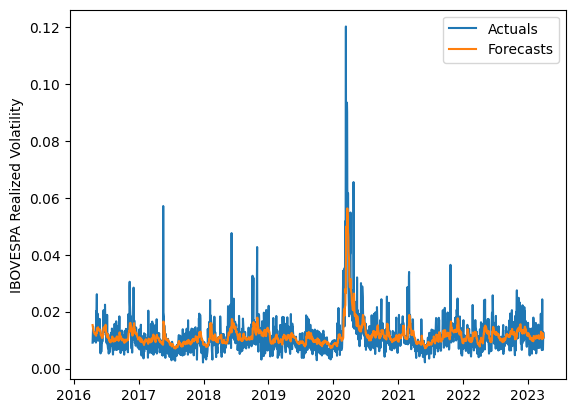

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("IBOVESPA Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=3 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/3)):
    row = [[a] for a in scaled_test_input[i*3:(i*3)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
len(test)%3

1

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 126
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(56, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(3))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  test=test[:len(test)-len(test)%3]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/3))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
122/122 [==============================] - 24s 8ms/step - loss: 0.0362 - accuracy: 0.3694 - mean_absolute_error: 0.0362
Epoch 2/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0328 - accuracy: 0.3832 - mean_absolute_error: 0.0328
Epoch 3/7
122/122 [==============================] - 1s 9ms/step - loss: 0.0319 - accuracy: 0.3855 - mean_absolute_error: 0.0319
Epoch 4/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0321 - accuracy: 0.3284 - mean_absolute_error: 0.0321
Epoch 5/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0321 - accuracy: 0.3438 - mean_absolute_error: 0.0321
Epoch 6/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0317 - accuracy: 0.3802 - mean_absolute_error: 0.0317
Epoch 7/7
18/18 [==============================] - 0s 3ms/step
Epoch 1/7
122/122 [==============================] - 3s 8ms/step - loss: 0.0369 - accuracy: 0.1218 - mean_absolute_error: 0.0369
Epoch 2/7
122/122 [=============

In [ ]:
RMSE

[0.0033720251748695835,
 0.003404367118229055,
 0.00345582795425936,
 0.0037273995167584626,
 0.0033397146599735625,
 0.003534209003145295,
 0.0034975571919844796,
 0.0035796732653178122,
 0.0034905137796144375,
 0.003371520382567929,
 0.003560696991270006,
 0.003388848558419704,
 0.0035141894881091035,
 0.0033963267141729355,
 0.0035474162265840036]

In [ ]:
Accuracy

[70.3932569925735,
 67.71972116788645,
 66.36503864048873,
 60.730625812178616,
 70.03290382815965,
 64.44012266897641,
 65.1835214087383,
 63.079162790770916,
 65.48674714742289,
 69.02426764584084,
 64.0264729282895,
 68.33564250486752,
 65.13239742292258,
 67.83752042357322,
 63.98321814105133]

In [ ]:
Quasilikelihood

[0.07047644643651321,
 0.07694285091097929,
 0.08099835001792845,
 0.09984647830664672,
 0.07074588056472542,
 0.0872252760634845,
 0.08476429854043632,
 0.0915224775290576,
 0.08349390066835903,
 0.07330333917198292,
 0.08882368930481532,
 0.0752352477655927,
 0.0847505767097111,
 0.07663663182812472,
 0.08843739095746378]

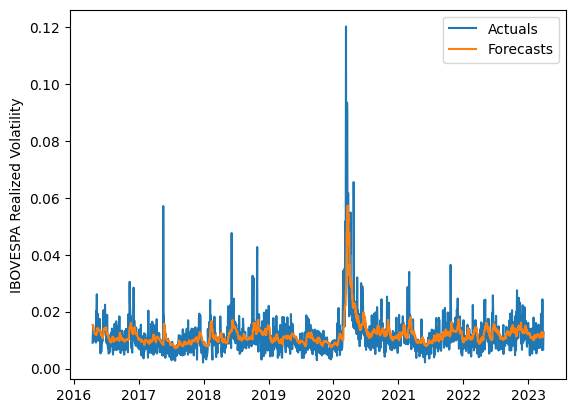

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("IBOVESPA Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=5 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/5)):
    row = [[a] for a in scaled_test_input[i*5:(i*5)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 126
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(56, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(5))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  test=test[:len(test)-len(test)%5]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/5))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
122/122 [==============================] - 3s 8ms/step - loss: 0.0368 - accuracy: 0.2194 - mean_absolute_error: 0.0368
Epoch 2/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0329 - accuracy: 0.3076 - mean_absolute_error: 0.0329
Epoch 3/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0323 - accuracy: 0.1628 - mean_absolute_error: 0.0323
Epoch 4/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0323 - accuracy: 0.2115 - mean_absolute_error: 0.0323
Epoch 5/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0320 - accuracy: 0.2225 - mean_absolute_error: 0.0320
Epoch 6/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0315 - accuracy: 0.1577 - mean_absolute_error: 0.0315
Epoch 7/7
11/11 [==============================] - 1s 4ms/step
Epoch 1/7
122/122 [==============================] - 3s 8ms/step - loss: 0.0351 - accuracy: 0.1964 - mean_absolute_error: 0.0351
Epoch 2/7
122/122 [===============

In [ ]:
RMSE

[0.0034862593609631177,
 0.003563339992043782,
 0.0035603652063092212,
 0.0037290332351209024,
 0.0035031539727538993,
 0.0035957878046546086,
 0.0034846763059277973,
 0.003649588444469141,
 0.003480876985471289,
 0.0034956194381127776,
 0.00346279716688512,
 0.0036120473819778332,
 0.00354640944217985,
 0.0034709715534617307,
 0.0035099250400124123]

In [ ]:
Accuracy

[68.20040145549527,
 65.11348831014902,
 66.89420173210542,
 62.04098809937628,
 66.49708888275066,
 63.71869819976722,
 70.48869672319039,
 63.238802615929224,
 67.8775191811996,
 68.99154790266915,
 68.60492104933384,
 64.04656791031475,
 65.05694258526675,
 68.13088405104853,
 66.42391021547633]

In [ ]:
Quasilikelihood

[0.07773963849074532,
 0.08606487429635687,
 0.08131138301328297,
 0.09661981491335406,
 0.08185093545700962,
 0.09069487778665408,
 0.07281034289586828,
 0.09240512799200627,
 0.0785981308385708,
 0.07633509864093929,
 0.07620259791000683,
 0.08985904113771966,
 0.0862985672469253,
 0.07776268288305009,
 0.08245414249813997]

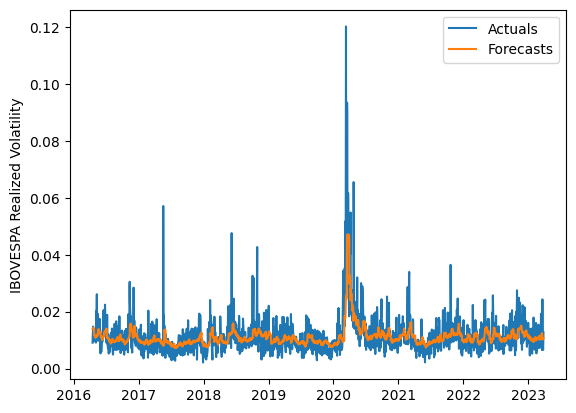

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("IBOVESPA Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=10 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/10)):
    row = [[a] for a in scaled_test_input[i*10:(i*10)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 126
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(56, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(10))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  test=test[:len(test)-len(test)%10]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/10))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
122/122 [==============================] - 4s 9ms/step - loss: 0.0365 - accuracy: 0.1120 - mean_absolute_error: 0.0365
Epoch 2/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0327 - accuracy: 0.0702 - mean_absolute_error: 0.0327
Epoch 3/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0322 - accuracy: 0.1356 - mean_absolute_error: 0.0322
Epoch 4/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0320 - accuracy: 0.0738 - mean_absolute_error: 0.0320
Epoch 5/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0317 - accuracy: 0.0736 - mean_absolute_error: 0.0317
Epoch 6/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0317 - accuracy: 0.1515 - mean_absolute_error: 0.0317
Epoch 7/7
6/6 [==============================] - 0s 3ms/step
Epoch 1/7
122/122 [==============================] - 4s 10ms/step - loss: 0.0384 - accuracy: 0.0587 - mean_absolute_error: 0.0384
Epoch 2/7
122/122 [================

In [ ]:
RMSE

[0.0036569894192465223,
 0.0035709615018810243,
 0.004004259965127597,
 0.003586236085517166,
 0.003596436221321307,
 0.003918558962102041,
 0.003721279852788411,
 0.0036549923212315333,
 0.0036041166684585035,
 0.003584082760163243,
 0.003608509036061763,
 0.0036316462838826952,
 0.0035807936160471942,
 0.003650394984202884,
 0.0035899071733983302]

In [ ]:
Accuracy

[64.7499453496762,
 67.28952555021877,
 57.55898550262414,
 69.78404436008029,
 69.44249154214826,
 60.601154895609625,
 63.19484099259596,
 64.82333265872539,
 66.82568998919379,
 66.56156461236395,
 67.18410123939155,
 65.9273691350017,
 66.88136559425212,
 65.09427221132806,
 68.85757582040013]

In [ ]:
Quasilikelihood

[0.08777112685698231,
 0.08050017361604538,
 0.112559692613305,
 0.07599011995188558,
 0.07657057176912359,
 0.10180200344060397,
 0.09274769027975717,
 0.08806538353334481,
 0.08184228289413373,
 0.08214279100694015,
 0.08075633091447372,
 0.0846608999064963,
 0.08188067410701756,
 0.08697230385389017,
 0.07726016002597742]

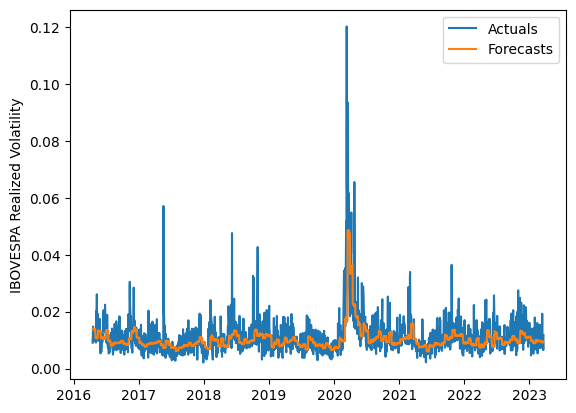

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("IBOVESPA Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=22 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/22)):
    row = [[a] for a in scaled_test_input[i*22:(i*22)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 126
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(56, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(22))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  test=test[:len(test)-len(test)%22]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/22))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
122/122 [==============================] - 3s 8ms/step - loss: 0.0370 - accuracy: 0.0510 - mean_absolute_error: 0.0370
Epoch 2/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0335 - accuracy: 0.0751 - mean_absolute_error: 0.0335
Epoch 3/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0323 - accuracy: 0.0226 - mean_absolute_error: 0.0323
Epoch 4/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0319 - accuracy: 0.0151 - mean_absolute_error: 0.0319
Epoch 5/7
122/122 [==============================] - 1s 8ms/step - loss: 0.0320 - accuracy: 0.0254 - mean_absolute_error: 0.0320
Epoch 6/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0319 - accuracy: 0.0156 - mean_absolute_error: 0.0319
Epoch 7/7
3/3 [==============================] - 0s 5ms/step
Epoch 1/7
122/122 [==============================] - 3s 8ms/step - loss: 0.0376 - accuracy: 0.0146 - mean_absolute_error: 0.0376
Epoch 2/7
122/122 [================

3/3 [==============================] - 0s 7ms/step
Epoch 1/7
122/122 [==============================] - 3s 8ms/step - loss: 0.0371 - accuracy: 0.1010 - mean_absolute_error: 0.0371
Epoch 2/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0328 - accuracy: 0.1551 - mean_absolute_error: 0.0328
Epoch 3/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0322 - accuracy: 0.1707 - mean_absolute_error: 0.0322
Epoch 4/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0321 - accuracy: 0.2033 - mean_absolute_error: 0.0321
Epoch 5/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0319 - accuracy: 0.1705 - mean_absolute_error: 0.0319
Epoch 6/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0320 - accuracy: 0.1054 - mean_absolute_error: 0.0320
Epoch 7/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0315 - accuracy: 0.1766 - mean_absolute_error: 0.0315


3/3 [==============================] - 0s 5ms/step
Epoch 1/7
122/122 [==============================] - 4s 8ms/step - loss: 0.0383 - accuracy: 0.0087 - mean_absolute_error: 0.0383
Epoch 2/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0326 - accuracy: 0.0036 - mean_absolute_error: 0.0326
Epoch 3/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0324 - accuracy: 0.0123 - mean_absolute_error: 0.0324
Epoch 4/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0324 - accuracy: 0.0233 - mean_absolute_error: 0.0324
Epoch 5/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0320 - accuracy: 0.0295 - mean_absolute_error: 0.0320
Epoch 6/7
122/122 [==============================] - 1s 7ms/step - loss: 0.0317 - accuracy: 0.0241 - mean_absolute_error: 0.0317
Epoch 7/7
3/3 [==============================] - 0s 5ms/step
Epoch 1/7
122/122 [==============================] - 4s 10ms/step - loss: 0.0373 - accuracy: 0.2138 - mean_absolut

In [ ]:
RMSE

[0.004049148386856408,
 0.003880209691656208,
 0.0037464259573741416,
 0.003981012447498031,
 0.0037557948269151104,
 0.0037818824154773334,
 0.003845516159699636,
 0.003809745745123991,
 0.003858891296709945,
 0.0039692537470487526,
 0.0037491850024242612,
 0.003797810345240289,
 0.003975083264506592,
 0.00384032249250857,
 0.00382192721295818]

In [ ]:
Accuracy

[58.62210774830978,
 61.942537434505795,
 66.64565187453671,
 59.880444014059854,
 65.44897310239556,
 66.65715131829178,
 62.52588913180953,
 64.5533936488598,
 62.8625096105696,
 59.036565938720464,
 65.77232745844286,
 64.78604967815951,
 59.58503557569925,
 63.79002082078996,
 63.65905167217443]

In [ ]:
Quasilikelihood

[0.11090376005217141,
 0.099403305641747,
 0.0864816055498529,
 0.10702623388860245,
 0.0886058285742416,
 0.08671506428297919,
 0.09757048703003449,
 0.09180921019380169,
 0.09682318475669105,
 0.10936982064455768,
 0.08777771995402701,
 0.09078160024691112,
 0.1075496639829081,
 0.0937681313516948,
 0.09369364007701234]

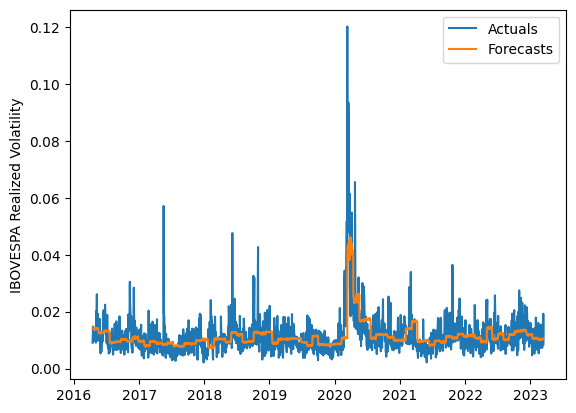

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("IBOVESPA Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])